
# LOAN PREDICTION DATA SCIENCE PROBLEM

*Luquiens, Guillaume*

Paris, FRANCE



# 1. Problem description

About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.
Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Practice Skills

Binary classification Python and R basics

# 2. Dataset Loaded

The dataset is available in the Analytics Vidhya competitions, with a train and test files Loan Prediction : [Loan Prediction datathon](https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/)

# 3. Manage data

A lot of transformations are to be done to get the best classifier results.
3.1 Import Libraries

The following code is written in Python 3. A lot of librairies are available with many intersting functions.
Data frame and arrays libraries


## 3.1. Import Librairies

**Arrays and data frame librairies**

In [3]:
import pandas as pd
import numpy as np

**Algorithms and models**

In [4]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

**Visualization librairies**

In [5]:
# librairies
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# plot description
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 12 , 8

## 3.2. Load data

In [6]:
#import data from file: https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
data_train = pd.read_csv('data/train.csv')


#a dataset should be broken into 3 splits: train, test, and (final) validation
#the test file provided is the validation file for competition submission
#we will split the train set into train and test data in future sections
data_test  = pd.read_csv('data/test.csv')

The train and test datasets are now downloaded. We can have a look at the first rows, with the columns header. It will give us an example of the available datas

In [7]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


On the elements available on those first loan_ID parameters, we see that coloumns have a different type of object. The info() function will describe those different elements

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


The number of entries should be 614 on each column. But some column have less than 614 entries. We calculate the number of empty entries we have.

In [9]:
data_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So, a statistic imputation is going to be needed to fill those Nan elements. A visualization of the features to understand this dataset is usefull to fill with the right imputation way. 

In [10]:
data_train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001350,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


## 3.3. Data Management

Because of the empty elements, we will have to analyse them. First, we can see that every column has a different number of empty entries, we must then think it is not linked!

In [11]:
#let's convert the data_train. With the sklearn tools, we need to have every row in numerical values.
data_encoded = pd.concat(
    [data_train.get(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']),
             pd.get_dummies(data_train.Gender, prefix='Gender', drop_first=True),
             pd.get_dummies(data_train.Married, prefix='Married', drop_first=True),
             pd.get_dummies(data_train.Dependents, prefix='Dependents', drop_first=True),
             pd.get_dummies(data_train.Education, prefix='Education', drop_first=True),
             pd.get_dummies(data_train.Self_Employed, prefix='Self_Employed', drop_first=True),
             pd.get_dummies(data_train.Property_Area, prefix='Property_Area', drop_first=True),
             pd.get_dummies(data_train.Loan_Status, prefix='Loan_Status', drop_first=True)],
    axis=1)

# how the concatenate function worked ??
data_encoded.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1


## 3.3. Fill the empty entries

In [12]:
data_encoded.isna().sum()

ApplicantIncome             0
CoapplicantIncome           0
LoanAmount                 22
Loan_Amount_Term           14
Credit_History             50
Gender_Male                 0
Married_Yes                 0
Dependents_1                0
Dependents_2                0
Dependents_3+               0
Education_Not Graduate      0
Self_Employed_Yes           0
Property_Area_Semiurban     0
Property_Area_Urban         0
Loan_Status_Y               0
dtype: int64

In [46]:
median_features = data_train.get(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
median_features.describe()

,LoanAmount,Loan_Amount_Term,Credit_History
count,592.000000,600.00000,564.000000
mean,146.412162,342.00000,0.842199
std,85.587325,65.12041,0.364878
min,9.000000,12.00000,0.000000
25%,100.000000,360.00000,1.000000
50%,128.000000,360.00000,1.000000
75%,168.000000,360.00000,1.000000
max,700.000000,480.00000,1.000000


In [47]:
median_features = median_features.dropna().median()
median_features

LoanAmount          128.0
Loan_Amount_Term    360.0
Credit_History        1.0
dtype: float64

In [48]:
data_encoded=data_encoded.fillna(median_features)

# 4. Visualization

In [49]:
data_encoded.head(2)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0


## 4.1. Loan Status to be predicted

We have a supervised prediction to do with the Loan Status : it is Yes (Y) or No (N).

In [50]:
print('Values to predict : ',data_train['Loan_Status'].unique())

Values to predict :  ['Y' 'N']


Compare the frequence of Loan_Status values

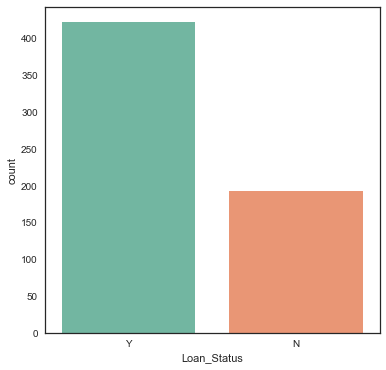

In [51]:
sns.set_palette('Set2') # A matplotlib colormap relevant for categorical values

fig1, ((ax1)) = plt.subplots(1, 1, figsize=(6,6))
sns.countplot(x='Loan_Status', data=data_train, ax=ax1)

We see that the Yes (Y) Status is twice bigger thant the No (N) one.

## 4.2. Features

### Continuous features

Intersting to check the distribution of the continuous features.

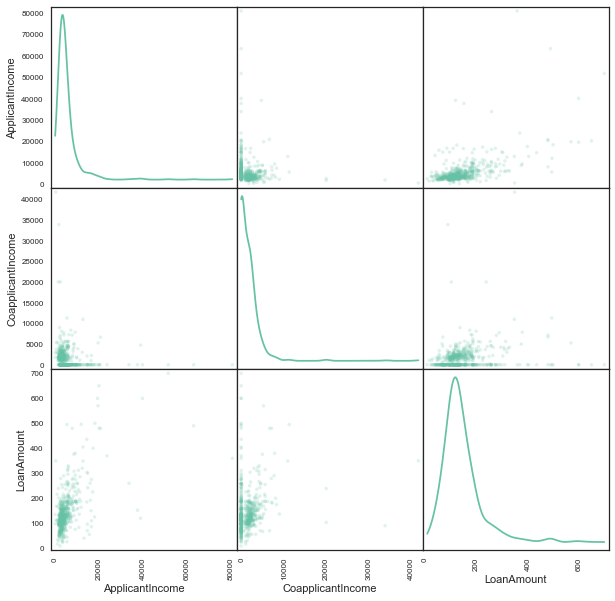

In [52]:
scatter_matrix(data_train.get(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']), alpha=0.2,
               figsize=(10, 10), diagonal='kde');

The ApplicantIncome and CoappliantIconme have a distribution very close to there min. Let's focus on those two columns

In [53]:
print('ApplicantIncome summary:\n', data_train['ApplicantIncome'].describe())
print('-'*20)
print('CoapplicantIncome summary:\n', data_train['CoapplicantIncome'].describe())

ApplicantIncome summary:
 count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64
--------------------
CoapplicantIncome summary:
 count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


So, for those two columns, the mean is very higher thant it's median (50%).

**We can see how to optimize those values**

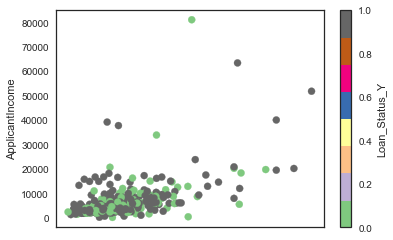

In [54]:
data_encoded.plot(kind='scatter', y='ApplicantIncome', x='LoanAmount', c='Loan_Status_Y', s=50, cmap='Accent');

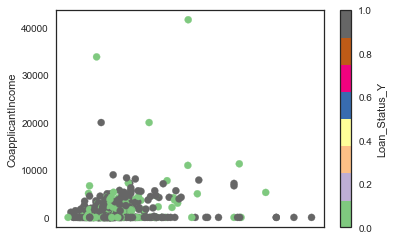

In [55]:
data_encoded.plot(kind='scatter', y='CoapplicantIncome', x='LoanAmount', c='Loan_Status_Y', s=50, cmap='Accent');

Maybe, a log function will optimize those two parameters

In [56]:
# we can't use the log function for a 0 value. So, because the min CoapplicantIncome is 0, we add 10 to the Coaaplicant Income vlaue
data_train_log = data_encoded.assign(LogIncome=lambda x: np.log(x.ApplicantIncome + 10.))
data_train_log = data_train_log.drop('ApplicantIncome', axis = 1)

In [57]:
data_train_log.head()

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,LogIncome
0,0.0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,8.675734
1,1508.0,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,8.432289
2,0.0,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1,8.009695
3,2358.0,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1,7.860571
4,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,8.701180


In [58]:
np.log(10)

2.302585092994046

In [59]:
# we can't use the log function for a 0 value. So, because the min CoapplicantIncome is 0, we add 10 to the Coaaplicant Income vlaue
data_train_log = data_train_log.assign(LogCoIncome=lambda x: np.log(x.CoapplicantIncome + 10.))
data_train_log = data_train_log.drop('CoapplicantIncome', axis = 1)

In [60]:
data_train_log.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,LogIncome,LogCoIncome
0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,8.675734,2.302585
1,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,8.432289,7.325149
2,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1,8.009695,2.302585
3,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1,7.860571,7.769801
4,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,8.701180,2.302585


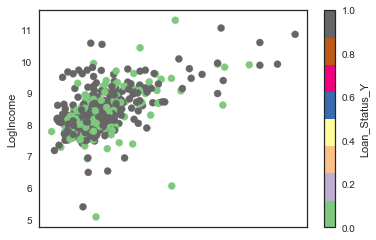

In [61]:
data_train_log.plot(kind='scatter', y='LogIncome', x='LoanAmount', c='Loan_Status_Y', s=50, cmap='Accent');

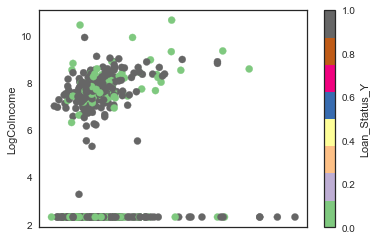

In [62]:
data_train_log.plot(kind='scatter', y='LogCoIncome', x='LoanAmount', c='Loan_Status_Y', s=50, cmap='Accent');

So, we have a balanced value of the incomes here. 

The CoApplicantIncome is very intersting when = 0 (so on the LogCoIncome = log(10)).
We could add a column with a binary distribution : 
- 0 when LogCoIncome = 1
- 1 when it's > 1 

In [63]:
data_train_log['LogCoIncome'].describe()

count    614.000000
mean       5.317267
std        2.746366
min        2.302585
25%        2.302585
50%        7.088665
75%        7.743805
max       10.637705
Name: LogCoIncome, dtype: float64

In [64]:
data_train_log['CoAppliant']=0*(data_train_log['LogCoIncome']<2.4)
data_train_log['CoAppliant']=1*(data_train_log['LogCoIncome']>2.4)

In [65]:
data_train_log.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,LogIncome,LogCoIncome,CoAppliant
0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,8.675734,2.302585,0
1,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,8.432289,7.325149,1
2,66.0,360.0,1.0,1,1,0,0,0,0,1,0,1,1,8.009695,2.302585,0
3,120.0,360.0,1.0,1,1,0,0,0,1,0,0,1,1,7.860571,7.769801,1
4,141.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,8.701180,2.302585,0


We will see what is the CoAppliant use in the Categorical features next anlysis !

**Compare the LogCoIcome with the LogIncome**

### Categorical features

Many columns have categorical values. To see what could be all the values for each of those features, we can print the different unique ones.

Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
Property_Area        614 non-null object

In [66]:
data_train['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [67]:
print('Values in Gender :', data_train['Gender'].unique())
print('Values in Married :', data_train['Married'].unique())
print('Values in Dependents :', data_train['Dependents'].unique())
print('Values in Education :', data_train['Education'].unique())
print('Values in Self_Employed :', data_train['Self_Employed'].unique())
print('Values in Property_Area :', data_train['Property_Area'].unique())

Values in Gender : ['Male' 'Female' nan]
Values in Married : ['No' 'Yes' nan]
Values in Dependents : ['0' '1' '2' '3+' nan]
Values in Education : ['Graduate' 'Not Graduate']
Values in Self_Employed : ['No' 'Yes' nan]
Values in Property_Area : ['Urban' 'Rural' 'Semiurban']


We can see how those different features are balanced

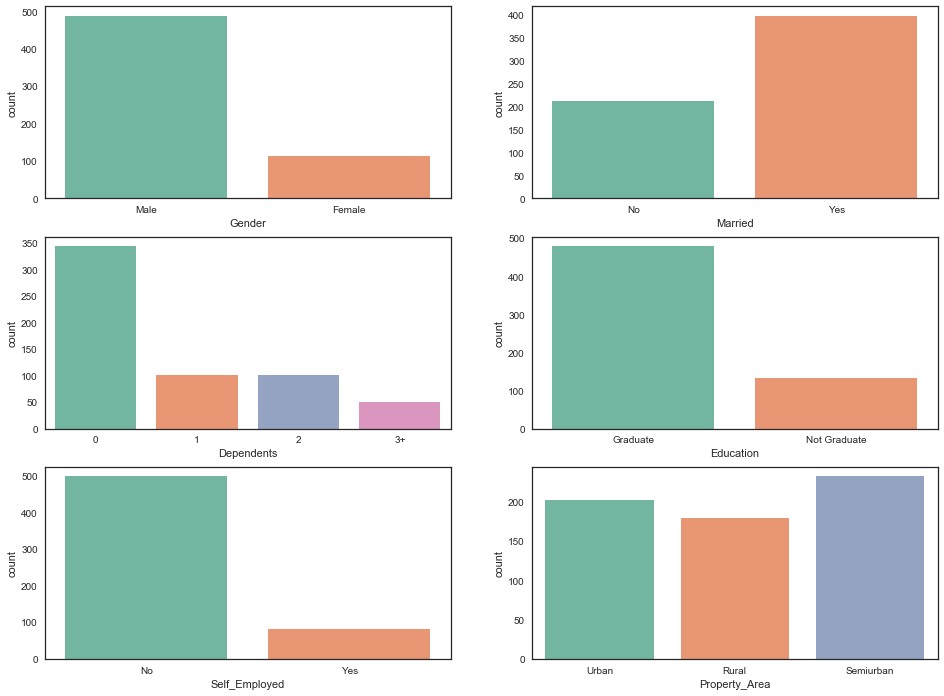

In [68]:
sns.set_palette('Set2') # A matplotlib colormap relevant for categorical values

fig1, ((ax1, ax2),(ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(16,12))
sns.countplot(x='Gender', data=data_train, ax=ax1)
sns.countplot(x='Married', data=data_train, ax=ax2)
sns.countplot(x='Dependents', data=data_train, ax=ax3)
sns.countplot(x='Education', data=data_train, ax=ax4);
sns.countplot(x='Self_Employed', data=data_train, ax=ax5);
sns.countplot(x='Property_Area', data=data_train, ax=ax6);

There is a lot to say here from these simple counts.

- First of all, almost all those features are heavily imbalanced.
- The vast majority of clients are male, married, with a 0 dependecy, gratuated and not self_employed (more than the half of the population actually) were traveling in 3rd class, the other passengers are almost equally split between 2nd and 1st classes.
- The Property_Area is instead almost balanced from the three areas. The Semiurban is the most important one.
- There were almost twice as many men as women travelling on the titanic.
- It seems also that a great number of passengers were traveling alone.

We can see make a summary of the most important client : a man married, undependent, with a graduation, and working in a company.

**Banking categorical Focus**

SOme of the integers column , with a banking focus are not continuous, but categorical : 
- Loan_Amount_Term
- Credit_History

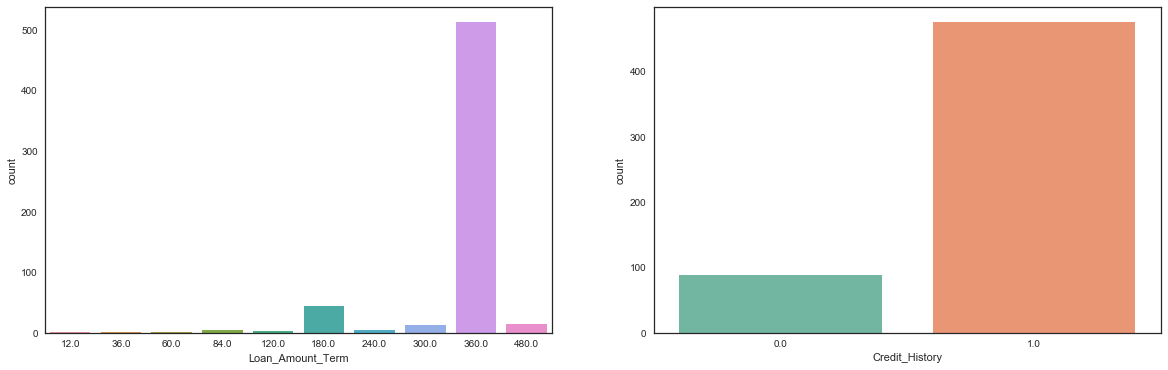

In [69]:
sns.set_palette('Set2') # A matplotlib colormap relevant for categorical values

fig1, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20,6))
sns.countplot(x='Loan_Amount_Term', data=data_train, ax=ax1)
sns.countplot(x='Credit_History', data=data_train, ax=ax2)

Here, we can see that credit history is alomost always 1, and loan_amount_term is 360.

**CoAppliant focus**

This column didn't exist. It was created with two values : 
- 0 if the CoAppliant value was 0 (and so our LogCoIncome<2.4)
- 1 if the CoAppliant value was >0 (and so our LogCoIncome>2.4)

So, the summary is if a coappliant exist, this column says : CoAppliant=1

In [70]:
print('The unique values of CoAppliant are : ', data_train_log['CoAppliant'].unique())

The unique values of CoAppliant are :  [0 1]


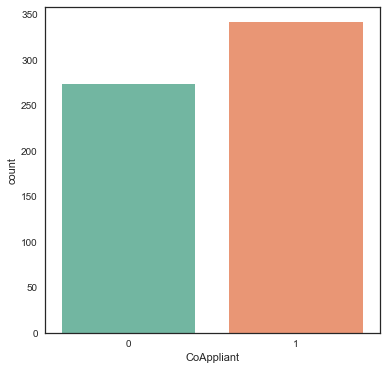

In [71]:
sns.set_palette('Set2') # A matplotlib colormap relevant for categorical values

fig1, ((ax1)) = plt.subplots(1, 1, figsize=(6,6))
sns.countplot(x='CoAppliant', data=data_train_log, ax=ax1)

OK, so a lot of clients have a CoAppliant. Let's compare the result on the Loan_Status with or without CoAppliant

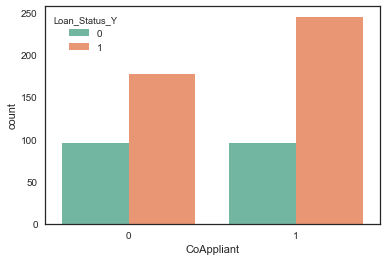

In [72]:
sns.countplot(x="CoAppliant", hue="Loan_Status_Y", data=data_train_log);

The very intersting point is that there is more Yes Loan_Status if there is a CoAppliant !

**Gender Focus**

We see that some column have no gender available

## 4.3. Correlation 

In [73]:
data_train_log.head(2)

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,LogIncome,LogCoIncome,CoAppliant
0,128.0,360.0,1.0,1,0,0,0,0,0,0,0,1,1,8.675734,2.302585,0
1,128.0,360.0,1.0,1,1,1,0,0,0,0,0,0,0,8.432289,7.325149,1


To have a good correlation, we must avoid the Loan_Id and Loan_Status more usefull is Loan_Status_int link, 

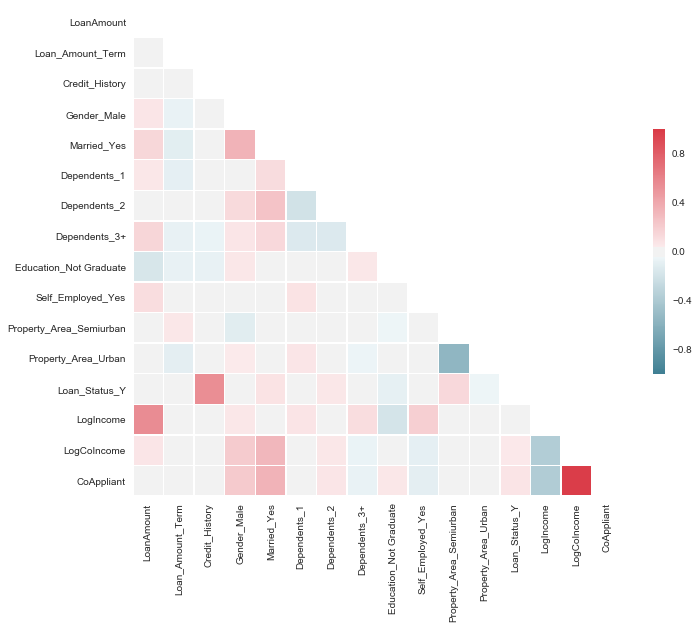

In [74]:
sns.set(style="white")

# The Loan Prediction dataset
d = data_train_log

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin = -1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The Credit_History seems to be the most correlated to the LogIncome

**Credit_History focus**

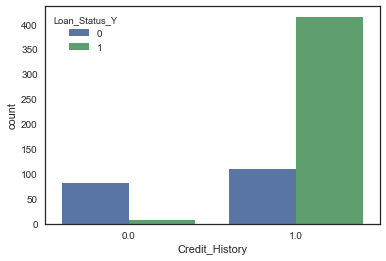

In [75]:
sns.countplot(x="Credit_History", hue="Loan_Status_Y", data=data_train_log);

# 5. Split training and testing

In [76]:
# X definition (called data here)
features = data_train_log.drop(['Loan_Status_Y'], axis=1)
X = features.values

# y definition (called target here)
survived_column = data_train_log['Loan_Status_Y']
y = survived_column.values

In [77]:
from sklearn.model_selection import train_test_split
# replace model_selection by cross_validation for old version of scikit-learn

features_train, features_test, target_train, target_test = train_test_split(
    X, y, test_size=0.20, random_state=0)

# 6. Model Analysis

We are now able to use different supervised algoritms. We will start with the Logistci Regression, that is a classifer, and not a regression...

In [78]:
# we can start with a Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=1.)
logreg.fit(features_train, target_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
target_predicted = logreg.predict(features_test)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(target_test, target_predicted)

0.8292682926829268

In [81]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, features, y, cv=6)
scores

array([0.82524272, 0.76699029, 0.7745098 , 0.81372549, 0.84313725,
       0.83333333])

In [82]:
# We can use the accuracy scoring
scores = cross_val_score(logreg, features, y, cv=5, scoring='accuracy')
print("Logistic Regression CV scores:")
print("min: {:.4f}, mean: {:.4f}, max: {:.4f}, std: {:.4f}".format(
    scores.min(), scores.mean(), scores.max(), scores.std()))

Logistic Regression CV scores:
min: 0.7581, mean: 0.8096, max: 0.8689, std: 0.0369


Now, we can compare the accuracy scoring of different Machine Learning Algoritms. We will now use a cross-validation of 10.

In [83]:
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_estimators = 100),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # Generalized Linear Models
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(max_iter=1000, tol=None),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(max_iter=5, tol=None),
    linear_model.Perceptron(max_iter=5, tol=None),
    
    # Navies Bayes
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(n_neighbors = 3),
    
    # SVM
    svm.SVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    ]

# create the data frame to compare MLA
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy', 'MLA Test Accuracy', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)


# index through MLA and save performance to table
row_index = 0
for alg in MLA:

    # set name and parameters
    MLA_compare.loc[row_index, 'MLA Name'] = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    # score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, features, y, cv  = 10, return_train_score=True)
    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy'] = cv_results['test_score'].mean()   

    MLA[row_index] = alg.fit (features, y) #fit model for submission

    row_index+=1

# print and sort table
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
# print(MLA_compare)
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy,MLA Test Accuracy,MLA Time
8,RidgeClassifierCV,"{'alphas': (0.1, 1.0, 10.0), 'class_weight': N...",0.809989,0.807806,0.0062494
6,LogisticRegressionCV,"{'Cs': 10, 'class_weight': None, 'cv': None, '...",0.810352,0.807806,0.362538
11,GaussianNB,{'priors': None},0.810354,0.80294,0.00156262
4,RandomForestClassifier,"{'bootstrap': True, 'class_weight': None, 'cri...",1,0.783372,0.109391
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': Non...",0.841116,0.778558,0.0578216
3,GradientBoostingClassifier,"{'criterion': 'friedman_mse', 'init': None, 'l...",0.883281,0.775176,0.0546886
1,BaggingClassifier,"{'base_estimator': None, 'bootstrap': True, 'b...",0.988238,0.74931,0.0156241
2,ExtraTreesClassifier,"{'bootstrap': False, 'class_weight': None, 'cr...",1,0.737887,0.00781119
16,ExtraTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.707208,0.00155876
15,DecisionTreeClassifier,"{'class_weight': None, 'criterion': 'gini', 'm...",1,0.698647,0.00156662


Text(0,0.5,'Algorithm')

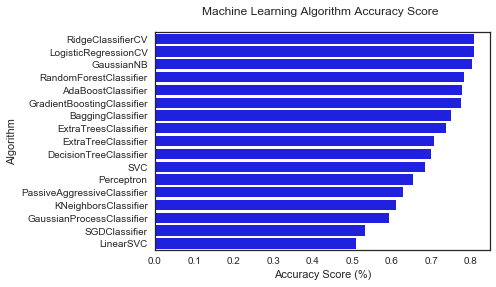

In [84]:
#MLA_compare.describe()
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy', y = 'MLA Name', data = MLA_compare, color = 'b')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

# 7. Algorithm Optimisation

The Generalized Linear Models don't seem to be very efficient.
Maybe, we could improve a lot the score using a GreadSerchCV to check which best score we can obtain.


In [85]:
%%time

from sklearn.ensemble import AdaBoostClassifier

from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold



n_estimators_list = [100, 200, 500, 1000]
#max_depth_list = [2, 3, 5]
learning_rate_list = [0.01, 0.02, 0.03, 0.05, 0.1]

# use of the tuned parameters
tuned_parameters = {'n_estimators': n_estimators_list,
                    #'max_depth': max_depth_list,
                    'learning_rate' : learning_rate_list}

# define your clf
clf = AdaBoostClassifier()

# et quand on a des heures pour choisir les meilleurs paramètres...
gs = GridSearchCV(clf, tuned_parameters, cv=5, refit=True, scoring='accuracy', n_jobs=3)
gs.fit(features, y)

C:\Users\GuiLu\Miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\GuiLu\Miniconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Wall time: 31.2 s


In [86]:
gs.best_params_

{'learning_rate': 0.02, 'n_estimators': 200}

In [87]:
gs.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.02, n_estimators=200, random_state=None)

In [88]:
gs.best_score_

0.8110749185667753

# 8. Test dataset analysis

## 8.1. Load the .csv file

In [89]:
# Read the test data
#test = pd.read_csv('data/test.csv', sep=';')

In [90]:
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [151]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [115]:
data_test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [128]:


# add the same columns to test !
test = pd.concat(
    [data_test.get(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History']),
             pd.get_dummies(data_test.Gender, prefix='Gender', drop_first=True),
             pd.get_dummies(data_test.Married, prefix='Married', drop_first=True),
             pd.get_dummies(data_test.Dependents, prefix='Dependents', drop_first=True),
             pd.get_dummies(data_test.Education, prefix='Education', drop_first=True),
             pd.get_dummies(data_test.Self_Employed, prefix='Self_Employed', drop_first=True),
             pd.get_dummies(data_test.Property_Area, prefix='Property_Area', drop_first=True)],
    axis=1)

# Use the log function for Apllicant and Coapplicant Incomes
test_new = test.assign(LogIncome=lambda x: np.log(x.ApplicantIncome + 10.))
test_new = test_new.assign(LogCoIncome=lambda x: np.log(x.CoapplicantIncome + 10.))

test_new['CoAppliant']=0*(test_new['LogCoIncome']<2.4)
test_new['CoAppliant']=1*(test_new['LogCoIncome']>2.4)

# drop the useless columns
test_new = test_new.drop(['ApplicantIncome','CoapplicantIncome'], axis=1)

In [129]:
test_new.isna().sum()

LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
LogIncome                  0
LogCoIncome                0
CoAppliant                 0
dtype: int64

In [130]:
median_features = data_test.get(['LoanAmount', 'Loan_Amount_Term', 'Credit_History'])
median_features.describe()

,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000
mean,135.980926,342.822888,0.839237
std,60.959739,64.658402,0.367814
min,28.000000,6.000000,0.000000
25%,101.000000,360.000000,1.000000
50%,125.000000,360.000000,1.000000
75%,157.500000,360.000000,1.000000
max,550.000000,480.000000,1.000000


In [131]:
median_features = median_features.dropna().median()
median_features

LoanAmount          125.0
Loan_Amount_Term    360.0
Credit_History        1.0
dtype: float64

In [132]:
test_new=test_new.fillna(median_features)

In [133]:
test_new.isna().sum()

LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
LogIncome                  0
LogCoIncome                0
CoAppliant                 0
dtype: int64

In [134]:
test_new.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LogIncome,LogCoIncome,CoAppliant
0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1,8.653471,2.302585,0
1,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1,8.034631,7.319865,1
2,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1,8.519191,7.501082,1
3,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1,7.762171,7.846199,1
4,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1,8.097426,2.302585,0


## 8.2. Use the fit and predict elements to the file test .csv

Use the best parameters we had : 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.02, n_estimators=200, random_state=None)

In [135]:
reg = AdaBoostClassifier(learning_rate=0.02, n_estimators=200)

In [136]:
scores = cross_val_score(reg, features, y, cv=4, scoring='accuracy',n_jobs=3)
print("Mean Absolute Error: {:.4f} +/-{:.4f}".format(
    np.mean(scores), np.std(scores)))

Mean Absolute Error: 0.8095 +/-0.0180


In [137]:
reg.fit(features, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.02, n_estimators=200, random_state=None)

In [138]:
test_new.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,LogIncome,LogCoIncome,CoAppliant
0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1,8.653471,2.302585,0
1,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1,8.034631,7.319865,1
2,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1,8.519191,7.501082,1
3,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1,7.762171,7.846199,1
4,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1,8.097426,2.302585,0


In [139]:
# Treat the test data in the same way as training data. In this case, pull same columns.
X_test = test_new
# Use the model to make predictions
predicted_target = reg.predict(X_test)
# We will look at the predicted TARGET to ensure we have something sensible.
print(predicted_target)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [145]:
# Convert the predicted target values to a dataframe
my_submission = pd.DataFrame({'Loan_ID': data_test.Loan_ID, 'Loan_Status': predicted_target})

Convert the Loan_Status 1 to Y and 0 to N

In [147]:
my_submission['Loan_Status']=my_submission['Loan_Status'].map({1: "Y", 0 : "N"})

In [148]:
my_submission.head(10)

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
5,LP001054,Y
6,LP001055,Y
7,LP001056,N
8,LP001059,Y
9,LP001067,Y


In [150]:
my_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
Loan_ID        367 non-null object
Loan_Status    367 non-null object
dtypes: object(2)
memory usage: 5.8+ KB


## 8.3. Transform the analysis to a sumbission .csv file

This file can only have two columns : 
- Load_id
- Loan_Status

In [149]:
# you could use any filename. We choose submission here
my_submission.to_csv('data/MySubmission.csv', index=False, header=True, sep=',')

Now, I can see the value of this prediction loan class ! 